In [1]:
from Precode2 import *
import numpy
import random
import seaborn as sns
from sklearn.cluster import KMeans
data = np.load('AllSamples.npy')

In [2]:
# k1,i_point1,k2,i_point2 = initial_S2('5263') # please replace 0111 with your last four digit of your ID
k1,i_point1 = initial_S2('5263',4) # please replace 0111 with your last four digit of your ID
k2,i_point2 = initial_S2('5263',6)

In [3]:
print(k1)
print(i_point1)
print(k2)
print(i_point2)

4
[2.10054891 1.44144019]
6
[7.59731342 1.16504743]


In [4]:
def intialize_centroids(k, initial_centroids=None):
    centroids=[]
    data_temp=list(data)
#     print(len(data_temp))
    
    if np.all(initial_centroids) == None:
        
        #first_centroid_index = initial_S2('5263',k)[1]
        centroids.append(initial_S2('5263',k)[1])
#         del data_temp[(np.where(((np.array(data_temp)==centroids)[:,0])==True)[0][0])]
#         print(len(data_temp))
        
#         first_centroid_index=random.randint(0, len(data)-1)
#         centroids.append(data_temp[first_centroid_index])
#        del data_temp[first_centroid_index]
    else:
        centroids.append(initial_centroids)
#         if sum(np.array(data_temp)==initial_centroids)[0]>0:
#             del data_temp[(np.where(((np.array(data_temp)==initial_centroids)[:,0])==True)[0][0])]
            
#     for i in range(k-1):
#         distances = []
#         for val in data_temp:
#             sum_differences=0
#             for val2 in data_temp:
#                 sum_differences+=np.linalg.norm(val-val2)
#             distances.append(sum_differences/len(centroids))
#         centroids.append(data_temp[np.argmax(distances)])

                    
    
    for i in range(k-1):
        distances=[]
        for val in data_temp:
            sum_differences=0
            for center in centroids:
                sum_differences+=np.linalg.norm(val-center)
            distances.append(sum_differences/len(centroids))
        centroids.append(data_temp[np.argmax(distances)])
        del data_temp[np.argmax(distances)]
#         print(len(data_temp))
                
    return centroids

In [5]:
intialize_centroids(4)

[array([2.10054891, 1.44144019]),
 array([9.26998864, 9.62492869]),
 array([ 3.85212146, -1.08715226]),
 array([2.95297924, 9.65073899])]

In [6]:
def run_kmeans(k, centroids=None):
    
    cost_func=[]
    
    if np.all(centroids) == None:
        centroids=intialize_centroids(k)
    
    while True:
        sum_sq_err=0
        data_clusters=[]
        for val in data:
            distances=[]
            for center in centroids:       
                distances.append(np.linalg.norm(val-center)**2)           
            sum_sq_err+=distances[np.argmin(distances)]
            data_clusters.append(str(np.argmin(distances)))

        cost_func.append(sum_sq_err)
        
        new_centroids=[]
        for i in range(len(centroids)):
            cluster_indices=[]
            for j in range(len(data_clusters)):
                if data_clusters[j]==str(i):
                    cluster_indices.append(j)

            new_centroid=0
            for index in cluster_indices:
                new_centroid+=data[index]
                
            if len(cluster_indices)!=0:
                new_centroid/=len(cluster_indices)
            else:
                new_centroid=np.array([0, 0])
                
            new_centroids.append(new_centroid)
        
        if np.array_equal(new_centroids, centroids):
            break
        else:
            centroids=new_centroids
    
    rounded_centroids=[]
    for val in centroids:
        edited_centroids=['%.8f' % elem for elem in val]
        edited_centroids=[float(elem) for elem in edited_centroids]
        rounded_centroids.append(edited_centroids)
    return [rounded_centroids, float('%.10f' % cost_func[-1])]

In [7]:
run_kmeans(4)

[[[3.35164768, 2.5706778],
  [6.85658333, 7.6614342],
  [7.41419243, 2.32169114],
  [3.153427, 6.9129207]],
 792.4951052482]

<b>State 1 results</b>

In [8]:
centroids, obj_func = run_kmeans(k1, i_point1)
print('Centroids: '+ str(centroids))
print('Loss: '+ str(obj_func))

Centroids: [[4.85261193, 7.27164171], [5.00056234, 2.48542748]]
Loss: 1921.0334858562


<b>State 2 results</b>

In [9]:
centroids, obj_func = run_kmeans(k2, i_point2)
print('Centroids: '+ str(centroids))
print('Loss: '+ str(obj_func))

Centroids: [[4.85261193, 7.27164171], [5.00056234, 2.48542748]]
Loss: 1921.0334858562


In [16]:
cost_funcs=[]
for k in range(2, 11):
    centroids, obj_func = run_kmeans(k)
    print('Number of Clusters: ' + str(k))
    print('Centroids: ' + str(centroids))
    print('Objective Function: ' + str(obj_func))
    print("-" * 125)
    cost_funcs.append(float(obj_func))

Number of Clusters: 2
Centroids: [[5.00056234, 2.48542748], [4.85261193, 7.27164171]]
Objective Function: 1921.0334858562
-----------------------------------------------------------------------------------------------------------------------------
Number of Clusters: 3
Centroids: [[7.23975119, 2.48208269], [4.83091958, 7.29959959], [3.23489005, 2.5530322]]
Objective Function: 1338.1076016521
-----------------------------------------------------------------------------------------------------------------------------
Number of Clusters: 4
Centroids: [[3.35164768, 2.5706778], [6.85658333, 7.6614342], [7.41419243, 2.32169114], [3.153427, 6.9129207]]
Objective Function: 792.4951052482
-----------------------------------------------------------------------------------------------------------------------------
Number of Clusters: 5
Centroids: [[7.25262683, 2.40015826], [5.40252508, 6.73636175], [7.75648325, 8.55668928], [3.21257461, 2.49658087], [2.60123296, 6.91610506]]
Objective Function: 6

<b>Randomly initialized centroids and multiple Ks round 1</b>

In [10]:
final_centroids=[]
cost_funcs=[]
for k in range(2, 11):
    print(k)
    centroids, obj_func = run_kmeans(k)
    final_centroids.append(centroids)
    cost_funcs.append(float(obj_func))

2
3
4
5
6
7
8
9
10


In [11]:
for i in range(len(final_centroids)):
    print('Number of Clusters: ' + str(i+2))
    print('Centroids: '+ str(centroids[i]))
    print('Loss: '+ str(cost_funcs[i]))
    print('-')

Number of Clusters: 2
Centroids: [4.81833058, 3.6950232]
Loss: 1921.0334858562
-
Number of Clusters: 3
Centroids: [8.39870753, 8.92549706]
Loss: 1338.1076016521
-
Number of Clusters: 4
Centroids: [3.16906145, 0.81432515]
Loss: 792.4951052482
-
Number of Clusters: 5
Centroids: [4.78842518, 7.88291646]
Loss: 613.2824392056
-
Number of Clusters: 6
Centroids: [7.92520233, 2.93850938]
Loss: 476.1187516764
-
Number of Clusters: 7
Centroids: [6.15468228, 5.70140721]
Loss: 363.2204443859
-
Number of Clusters: 8
Centroids: [2.53650108, 6.85941978]
Loss: 352.2440157609
-
Number of Clusters: 9
Centroids: [2.24204752, 3.25100749]
Loss: 241.3112746805
-
Number of Clusters: 10
Centroids: [7.34195588, 8.23743982]
Loss: 227.8390219595
-


C:\Users\wayne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

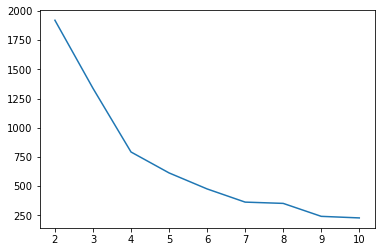

In [12]:
sns.lineplot(list(range(2, 11)), cost_funcs)

<b>Randomly initialized centroids and multiple Ks round 2</b>

In [13]:
final_centroids=[]
cost_funcs=[]
for k in range(2, 11):
    print(k)
    centroids, obj_func = run_kmeans(k)
    final_centroids.append(centroids)
    cost_funcs.append(float(obj_func))

2
3
4
5
6
7
8
9
10


In [14]:
for i in range(len(final_centroids)):
    print('Number of Clusters: ' + str(i+2))
    print('Centroids: '+ str(centroids[i]))
    print('Loss: '+ str(cost_funcs[i]))
    print('-')

Number of Clusters: 2
Centroids: [4.81833058, 3.6950232]
Loss: 1921.0334858562
-
Number of Clusters: 3
Centroids: [8.39870753, 8.92549706]
Loss: 1338.1076016521
-
Number of Clusters: 4
Centroids: [3.16906145, 0.81432515]
Loss: 792.4951052482
-
Number of Clusters: 5
Centroids: [4.78842518, 7.88291646]
Loss: 613.2824392056
-
Number of Clusters: 6
Centroids: [7.92520233, 2.93850938]
Loss: 476.1187516764
-
Number of Clusters: 7
Centroids: [6.15468228, 5.70140721]
Loss: 363.2204443859
-
Number of Clusters: 8
Centroids: [2.53650108, 6.85941978]
Loss: 352.2440157609
-
Number of Clusters: 9
Centroids: [2.24204752, 3.25100749]
Loss: 241.3112746805
-
Number of Clusters: 10
Centroids: [7.34195588, 8.23743982]
Loss: 227.8390219595
-


C:\Users\wayne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

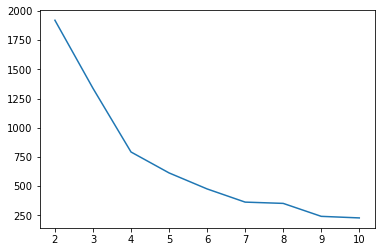

In [15]:
sns.lineplot(list(range(2, 11)), cost_funcs)